In [134]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
from sklearn.datasets import load_iris
import pandas as pd

In [135]:
df_rt1 = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t')

In [136]:
df_rt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [137]:
df_rt2 = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding="cp1252")

In [138]:
df_rt2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [139]:
df_rt = df_rt1.merge(df_rt2, how='inner', on='id')

In [140]:
df_rt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54432 entries, 0 to 54431
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54432 non-null  int64 
 1   synopsis      54300 non-null  object
 2   rating_x      54346 non-null  object
 3   genre         54345 non-null  object
 4   director      48992 non-null  object
 5   writer        45206 non-null  object
 6   theater_date  53206 non-null  object
 7   dvd_date      53206 non-null  object
 8   currency      33310 non-null  object
 9   box_office    33310 non-null  object
 10  runtime       53594 non-null  object
 11  studio        40125 non-null  object
 12  review        48869 non-null  object
 13  rating_y      40915 non-null  object
 14  fresh         54432 non-null  object
 15  critic        51710 non-null  object
 16  top_critic    54432 non-null  int64 
 17  publisher     54123 non-null  object
 18  date          54432 non-null  object
dtypes: i

In [141]:
import string
df_rt['box_office'] = df_rt['box_office'].str.replace('[{}]'.format(string.punctuation), '')

In [142]:
df_rt['box_office'] = df_rt['box_office'].apply(lambda x: float(x))

In [143]:
df_rt['runtime'] = df_rt['runtime'].str.strip('minutes')

In [144]:
df_rt['theater_date'] = pd.to_datetime(df_rt['theater_date'], )

In [145]:
df_rt.dropna(subset=['rating_y'], inplace=True)

In [146]:
ratings = list(df_rt['rating_y'].value_counts().index[0:186])

In [147]:
ratings

['3/5',
 '4/5',
 '3/4',
 '2/5',
 '2/4',
 '2.5/4',
 '3.5/4',
 '3.5/5',
 '5/5',
 'B',
 '1/5',
 '1.5/4',
 '4/4',
 '2.5/5',
 'B+',
 '1/4',
 'B-',
 'C',
 'C+',
 '4.5/5',
 '7/10',
 'A-',
 '8/10',
 'C-',
 '6/10',
 '1.5/5',
 'A',
 '5/10',
 'D',
 '9/10',
 '4/10',
 'D+',
 '0/5',
 '8',
 '3/10',
 '1',
 '0/4',
 '7',
 'F',
 '0.5/4',
 'D-',
 '6',
 '2/10',
 'A+',
 '7.5/10',
 '0.5/5',
 '5',
 '8.5/10',
 '6.5/10',
 '4',
 '9',
 '3',
 '1/10',
 '5.5/10',
 '4.5/10',
 '3.0/4',
 '3.5',
 '9.5/10',
 '3/6',
 '2.0/5',
 '3.0/5',
 '4.0/4',
 '2',
 '4/6',
 '2.1/2',
 '5.0/5',
 '2.5',
 '6/8',
 '2.7',
 '2/6',
 '4.0/5',
 '7.1/10',
 '6.0/10',
 '0',
 '2.5/10',
 '4.5',
 'R',
 '5.9/10',
 '5.0/10',
 '8.2/10',
 '2.2',
 '3.7',
 '1.5',
 '7.9/10',
 '5.5/5',
 '0/10',
 '3.5/10',
 '8.0/10',
 '2.0/4',
 '7.4/10',
 '6.8/10',
 '7.2/10',
 '8.9/10',
 '5/6',
 '1.5/10',
 '8.4/10',
 '4.7',
 '9.2/10',
 '3.2',
 '1/6',
 '1.0/4',
 '3.8/5',
 '7.7/10',
 '3.0',
 '8.6/10',
 '8.1/10',
 '2.4/5',
 '8.3/10',
 '4.8',
 '9.0/10',
 '1.9/5',
 '5.8',
 '2/2',
 

In [148]:
def standardize(rating):
    if rating.endswith('5') and '/' in rating and '.' in rating:
        return (float(rating[0:3]) / float(rating[-1])) * 100
    elif rating.endswith('10') and '/' in rating and '.' in rating:
        return (float(rating[0:3]) / float(rating[-2:])) * 100
    elif rating.endswith('5') and '/' in rating:
        return (float(rating[0]) / float(rating[-1])) * 100
    elif rating.endswith('10') and '/' in rating:
        return (float(rating[0]) / float(rating[-2:])) * 100
    elif rating == 'A+':
        return 98
    elif rating == 'A':
        return 95
    elif rating == 'A-':
        return 92
    elif rating == 'B+':
        return 88
    elif rating == 'B':
        return 85
    elif rating == 'B-':
        return 82
    elif rating == 'C+':
        return 78
    elif rating == 'C':
        return 75
    elif rating == 'C-':
        return 72
    elif rating == 'D+': 
        return 68
    elif rating == 'D':
        return 65
    elif rating == 'D-':
        return 62
        

In [149]:
standardized_list = []
for rating in ratings:
    new_rating = standardize(rating)
    standardized_list.append(new_rating)

In [150]:
standardized_list.index(110.00000000000001)

84

In [151]:
df_rt['rating_y'] = df_rt['rating_y'].apply(standardize)

In [152]:
df_rt.dropna(subset=['rating_y'], inplace=True)

In [153]:
df_rt['rating_y']

0        60.0
6        75.0
7        40.0
11       82.0
13       85.0
         ... 
54424    30.0
54428    20.0
54429    40.0
54430    50.0
54431    60.0
Name: rating_y, Length: 26352, dtype: float64

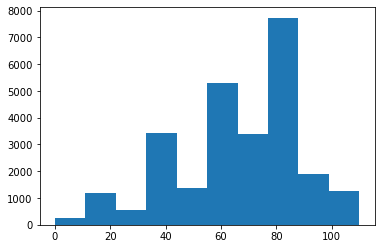

In [154]:
fig, ax = plt.subplots()
ax.hist(df_rt['rating_y']);

In [155]:
df_rt.dropna(subset=['box_office'], inplace=True)

In [156]:
def fresh(rating):
    if rating == 'fresh':
        return 1
    elif rating == 'rotten':
        return 0 

In [157]:
df_rt['fresh'] = df_rt['fresh'].apply(fresh)

In [158]:
df_rt['currency'].value_counts()

$    15686
Name: currency, dtype: int64

In [159]:
df_rt['rating_y'] = df_rt.groupby('id')['rating_y'].transform(
    lambda grp: np.mean(grp)
)
df_rt['fresh'] = df_rt.groupby('id')['fresh'].transform(
    lambda grp: np.mean(grp)
)

In [160]:
df_rt = df_rt.drop_duplicates(subset='id')

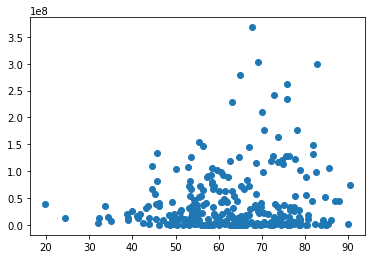

In [161]:
fig, ax = plt.subplots()
x = df_rt['rating_y']
y = df_rt['box_office']
ax.scatter(x,y);

In [162]:
df_rt.groupby('rating_x').mean()

,id,box_office,rating_y,fresh,top_critic
rating_x,,,,,
G,1309.000000,2.284580e+07,65.141945,0.576329,0.142857
NR,1154.071429,6.628353e+05,67.271617,0.742719,0.214286
PG,1051.688889,5.045734e+07,61.944537,0.531795,0.066667
PG-13,1085.168224,5.603056e+07,60.420398,0.459591,0.009346
R,942.206349,2.554368e+07,66.141166,0.629225,0.015873


In [163]:
df_rt['box_office'] = df_rt['box_office'].apply(lambda x: x/1000000)

Text(0.5, 1.0, 'Movie Box Office Earnings versus Standardized Rating')

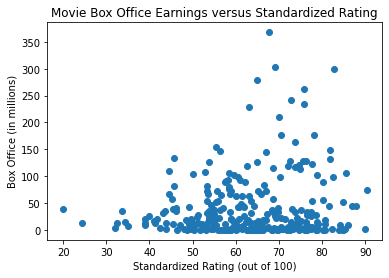

In [164]:
fig, ax = plt.subplots()
x = df_rt['rating_y']
y = df_rt['box_office']
ax.scatter(x,y);
ax.set_xlabel('Standardized Rating (out of 100)')
ax.set_ylabel('Box Office (in millions)')
ax.set_title('Movie Box Office Earnings versus Standardized Rating')

In [170]:
df_rt['fresh'] = df_rt['fresh'].apply(lambda x: round(x,2))
df_rt['rating_y'] = df_rt['rating_y'].apply(lambda x: round(x,2))

In [171]:
df_rt

,id,synopsis,rating_x,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,review,rating_y,fresh,critic,top_critic,publisher,date
0,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",$,0.600000,108,Entertainment One,A distinctly gallows take on contemporary fina...,65.70,0.70,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
318,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,2002-01-11,"Jun 18, 2002",$,41.032915,82,Paramount Pictures,"It won't stick with you forever, but you will ...",57.03,0.42,NaN,0,Film4,"August 12, 2008"
427,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,2006-04-27,"Oct 2, 2007",$,0.224114,123,Sony Pictures Classics,Although Jindabyne's cinematography features s...,71.88,0.73,Heather Huntington,0,ReelzChannel.com,"August 25, 2008"
521,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,2010-06-30,"Nov 9, 2010",$,0.134904,117,NaN,A captivating film... [Full review in Spanish],62.62,0.25,Laura Hiros,0,NaN,"March 22, 2018"
726,23,A fictional film set in the alluring world of ...,R,Drama,NaN,NaN,2013-12-20,"Mar 18, 2014",$,99.165609,129,Sony Pictures,The movie is great. It is interesting without ...,82.44,0.97,Debbie Baldwin,0,Ladue News,"November 2, 2018"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53572,1976,"Embrace of the Serpent features the encounter,...",NR,Action and Adventure|Art House and International,Ciro Guerra,Ciro Guerra|Jacques Toulemonde Vidal,2016-02-17,"Jun 21, 2016",$,1.320005,123,Buffalo Films,Mesmerising.,85.33,1.00,Tom Bond,0,Total Film,"December 27, 2016"
53718,1980,A band of renegades on the run in outer space ...,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,Joss Whedon,2005-09-30,"Dec 20, 2005",$,25.335935,119,Universal Pictures,A lovely example of TV sci-fi doing what it do...,77.47,0.81,Tim Brayton,0,Alternate Ending,"September 6, 2017"
53887,1981,"Money, Fame and the Knowledge of English. In I...",NR,Comedy|Drama,Gauri Shinde,Gauri Shinde,2012-10-05,"Nov 20, 2012",$,1.416189,129,Eros Entertainment,A capable supporting cast and a fun cameo from...,60.00,1.00,Anil Sinanan,1,Time Out,"October 23, 2017"
53892,1986,Aki Kaurismaki's The Man Without a Past opens ...,PG,Art House and International|Comedy|Drama,NaN,NaN,2002-08-30,"Oct 7, 2003",$,0.794306,97,NaN,With its rusty railroads and dingy metal canis...,84.44,1.00,Jeffrey Overstreet,0,Looking Closer,"December 6, 2004"


In [172]:
df_copy = df_rt

In [173]:
df_copy.dropna(subset=['runtime'], inplace=True)

In [174]:
df_copy['runtime'] = df_copy['runtime'].apply(lambda x: int(x))

Text(0.5, 1.0, 'Movie Box Office Earnings versus Run Time')

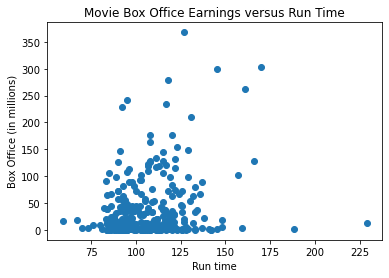

In [176]:
fig, ax = plt.subplots()
x = df_copy['runtime']
y = df_copy['box_office']
ax.scatter(x,y);
ax.set_xlabel('Run time')
ax.set_ylabel('Box Office (in millions)')
ax.set_title('Movie Box Office Earnings versus Run Time')